# Pandas and Covid19 Data

This notebook uses the Python package Pandas on Covid19 Data using the following Data Science Pipeline steps:
1. Acquisition
2. Data Wrangling
3. Visualization

Resources:

- Code from this notebook: [Pandas and COVID-19 Data.ipynb](https://colab.research.google.com/drive/12IyckouU_Mqr9x5uTNvFyVuJ2ZGO5g9m#scrollTo=v6-QsO3bN1-7)

- From Workshop Series: [COVID-19 Data Tutorial](https://browndsi.github.io/covid19/), Author: [Sam Watson](http://www.math.brown.edu/~sswatson/)

- Covid19 Data from [JHU CSSE](https://github.com/CSSEGISandData/COVID-19)
 
- Data Gymnasia - [Data Science Pipeline](https://mathigon.org/course/intro-data-pipeline/introduction)

# 1. Acquisition

### Clone data from github repo to local environment

In [9]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


### Import pandas

In [8]:
import pandas as pd

### Read single file as pandas dataframe as test

In [24]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv")
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


### Read all files into one single pandas dataframe

In [25]:
import datetime

# define functions 

def csv_filename(date):
    basedir = "COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/"
    return basedir + date.strftime("%m-%d-%Y") + ".csv"

def get_dataframe(date): 
    df = pd.read_csv(csv_filename(date))
    df.insert(0, "Date", date.strftime("%Y-%m-%d"))
    df.columns = df.columns.str.replace("/", "_")
    df.Country_Region = df.Country_Region.str.replace("Mainland China", "China")
    return df

# import files for defined data range
yesterday = datetime.datetime.today().date() - datetime.timedelta(days=1)
date_range = pd.date_range(datetime.date(2020, 1, 23), yesterday)
data_frames = [get_dataframe(date) for date in date_range]

# concatenate or combine dataframes
df = pd.concat(data_frames).reset_index(drop = True)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Active,Admin2,Case-Fatality_Ratio,Combined_Key,Confirmed,Country_Region,Date,Deaths,FIPS,Incidence_Rate,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province_State,Recovered
0,NaN,NaN,NaN,NaN,9.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Anhui,NaN
1,NaN,NaN,NaN,NaN,22.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Beijing,NaN
2,NaN,NaN,NaN,NaN,9.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Chongqing,NaN
3,NaN,NaN,NaN,NaN,5.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Fujian,NaN
4,NaN,NaN,NaN,NaN,2.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Gansu,NaN


# 2. Data Wrangling

### Which countries are in the data? How many?

In [27]:
df["Country_Region"].unique()

array(['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand',
       'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam',
       'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal',
       'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK',
       'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran',
       'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain',
       'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland',
       'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway',
       'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino',
       ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand',
       'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco',
       'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Moroc

In [28]:
len(df["Country_Region"].unique())

237

### Filter data for a subset sample to work with

In [29]:
countries = ["China", "Japan", "Singapore",
             "Spain", "Italy", "Sweden", "Egypt",
             "Kenya", "US", "Mexico", "Brazil"]

In [47]:
df.query("Country_Region in @countries") # query where country region equals to @country object

,Active,Admin2,Case-Fatality_Ratio,Combined_Key,Confirmed,Country_Region,Date,Deaths,FIPS,Incidence_Rate,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province_State,Recovered
0,NaN,NaN,NaN,NaN,9.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Anhui,NaN
1,NaN,NaN,NaN,NaN,22.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Beijing,NaN
2,NaN,NaN,NaN,NaN,9.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Chongqing,NaN
3,NaN,NaN,NaN,NaN,5.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Fujian,NaN
4,NaN,NaN,NaN,NaN,2.0,China,2020-01-23,NaN,NaN,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN,NaN,Gansu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299391,177.0,NaN,11.274510,"Zacatecas, Mexico",612.0,Mexico,2020-06-18,69.0,NaN,36.725303,NaN,2020-06-19 04:33:17,22.770900,NaN,-102.583200,NaN,Zacatecas,366.0
299394,1.0,NaN,0.078802,"Zhejiang, China",1269.0,China,2020-06-18,1.0,NaN,2.211957,NaN,2020-06-19 04:33:17,29.183200,NaN,120.093400,NaN,Zhejiang,1267.0
299443,34971.0,NaN,3.842417,Egypt,50437.0,Egypt,2020-06-18,1938.0,NaN,49.286456,NaN,2020-06-19 04:33:17,26.820553,NaN,30.802498,NaN,NaN,13528.0
299476,2681.0,NaN,2.748414,Kenya,4257.0,Kenya,2020-06-18,117.0,NaN,7.916863,NaN,2020-06-19 04:33:17,-0.023600,NaN,37.906200,NaN,NaN,1459.0


### Aggregate total counts by groups

In [32]:
(df.query("Country_Region in @countries") # query where country region equals to @country object
   .groupby(["Date", "Country_Region"])   # group by date and country region
   .agg('sum'))                           # aggregate values

Active  Case-Fatality_Ratio  Confirmed  \
Date       Country_Region                                              
2020-01-23 Brazil                0.0             0.000000        0.0   
           China                 0.0             0.000000      639.0   
           Japan                 0.0             0.000000        1.0   
           Mexico                0.0             0.000000        0.0   
           Singapore             0.0             0.000000        1.0   
...                              ...                  ...        ...   
2020-06-18 Mexico            23528.0           370.746867   165455.0   
           Singapore          8735.0             0.062691    41473.0   
           Spain             67756.0           187.208908   245268.0   
           Sweden            50990.0           157.298906    56043.0   
           US              1398669.0          9955.153993  2191053.0   

                             Deaths        FIPS  Incidence_Rate  \
Date       Country_Region                                         
2020-01-23 Brazil               0.0         0.0    0.000000e+00   
           China               18.0         0.0    0.000000e+00   
           Japan                0.0         0.0    0.000000e+00   
           Mexico               0.0         0.0    0.000000e+00   
           Singapore            0.0         0.0    0.000000e+00   
...                             ...         ...             ...   
2020-06-18 Mexico           19747.0         0.0    3.758095e+03   
           Singapore           26.0         0.0    7.088986e+02   
           Spain            27136.0         0.0    9.129436e+03   
           Sweden            5053.0         0.0    1.030964e+04   
           US              118440.0  96189783.0    1.291875e+06   

                                     Lat  Latitude          Long_  Longitude  \
Date       Country_Region                                                      
2020-01-23 Brazil               0.000000       0.0       0.000000        0.0   
           China                0.000000       0.0       0.000000        0.0   
           Japan                0.000000       0.0       0.000000        0.0   
           Mexico               0.000000       0.0       0.000000        0.0   
           Singapore            0.000000       0.0       0.000000        0.0   
...                                  ...       ...            ...        ...   
2020-06-18 Mexico             695.047500       0.0   -3216.873200        0.0   
           Singapore            1.283300       0.0     103.833300        0.0   
           Spain              755.510158       0.0     -69.972552        0.0   
           Sweden            1253.293500       0.0     330.466900        0.0   
           US              115423.844331       0.0 -275929.917422        0.0   

                           Recovered  
Date       Country_Region             
2020-01-23 Brazil                0.0  
           China                30.0  
           Japan                 0.0  
           Mexico                0.0  
           Singapore             0.0  
...                              ...  
2020-06-18 Mexico           122180.0  
           Singapore         32712.0  
           Spain            150376.0  
           Sweden                0.0  
           US               599115.0  

[1463 rows x 11 columns]

### Filter total confirmed counts and unstack dataframe

In [44]:
(df.query("Country_Region in @countries") # query where country region equals to @country object
   .groupby(["Date", "Country_Region"])   # group by date and country region
   .agg('sum')                            # aggregate values
   ["Confirmed"]                          # only use confirmed column
   .unstack())                            # unstack dataframe

Country_Region,Brazil,China,Egypt,Italy,Japan,Kenya,Mexico,Singapore,Spain,Sweden,US
Date,,,,,,,,,,,
2020-01-23,0.0,639.0,NaN,NaN,1.0,NaN,0.0,1.0,NaN,NaN,1.0
2020-01-24,NaN,916.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,2.0
2020-01-25,NaN,1399.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,2.0
2020-01-26,NaN,2062.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,5.0
2020-01-27,NaN,2863.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-14,867624.0,84335.0,44598.0,236989.0,17369.0,3594.0,146837.0,40604.0,243928.0,51614.0,2094058.0
2020-06-15,888271.0,84378.0,46289.0,237290.0,17439.0,3727.0,150264.0,40818.0,244109.0,52383.0,2114026.0
2020-06-16,923189.0,84422.0,47856.0,237500.0,17484.0,3860.0,154863.0,40969.0,244328.0,53323.0,2137731.0


# 3. Visualize

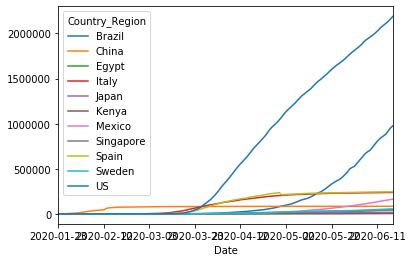

In [49]:
(df.query("Country_Region in @countries")
   .groupby(["Date", "Country_Region"])
   .agg('sum')
   ["Confirmed"]
   .unstack()
   .plot())